In [1]:
import cv2
import numpy as np
import seaborn as sns
from keras import Input
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = 32,
    image_size=(224, 224)
)

Found 5218 files belonging to 2 classes.


In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = 32,
    image_size=(224, 224)
)


Found 624 files belonging to 2 classes.


In [4]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'val',
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = 32,
    image_size=(224, 224)
)


Found 16 files belonging to 2 classes.


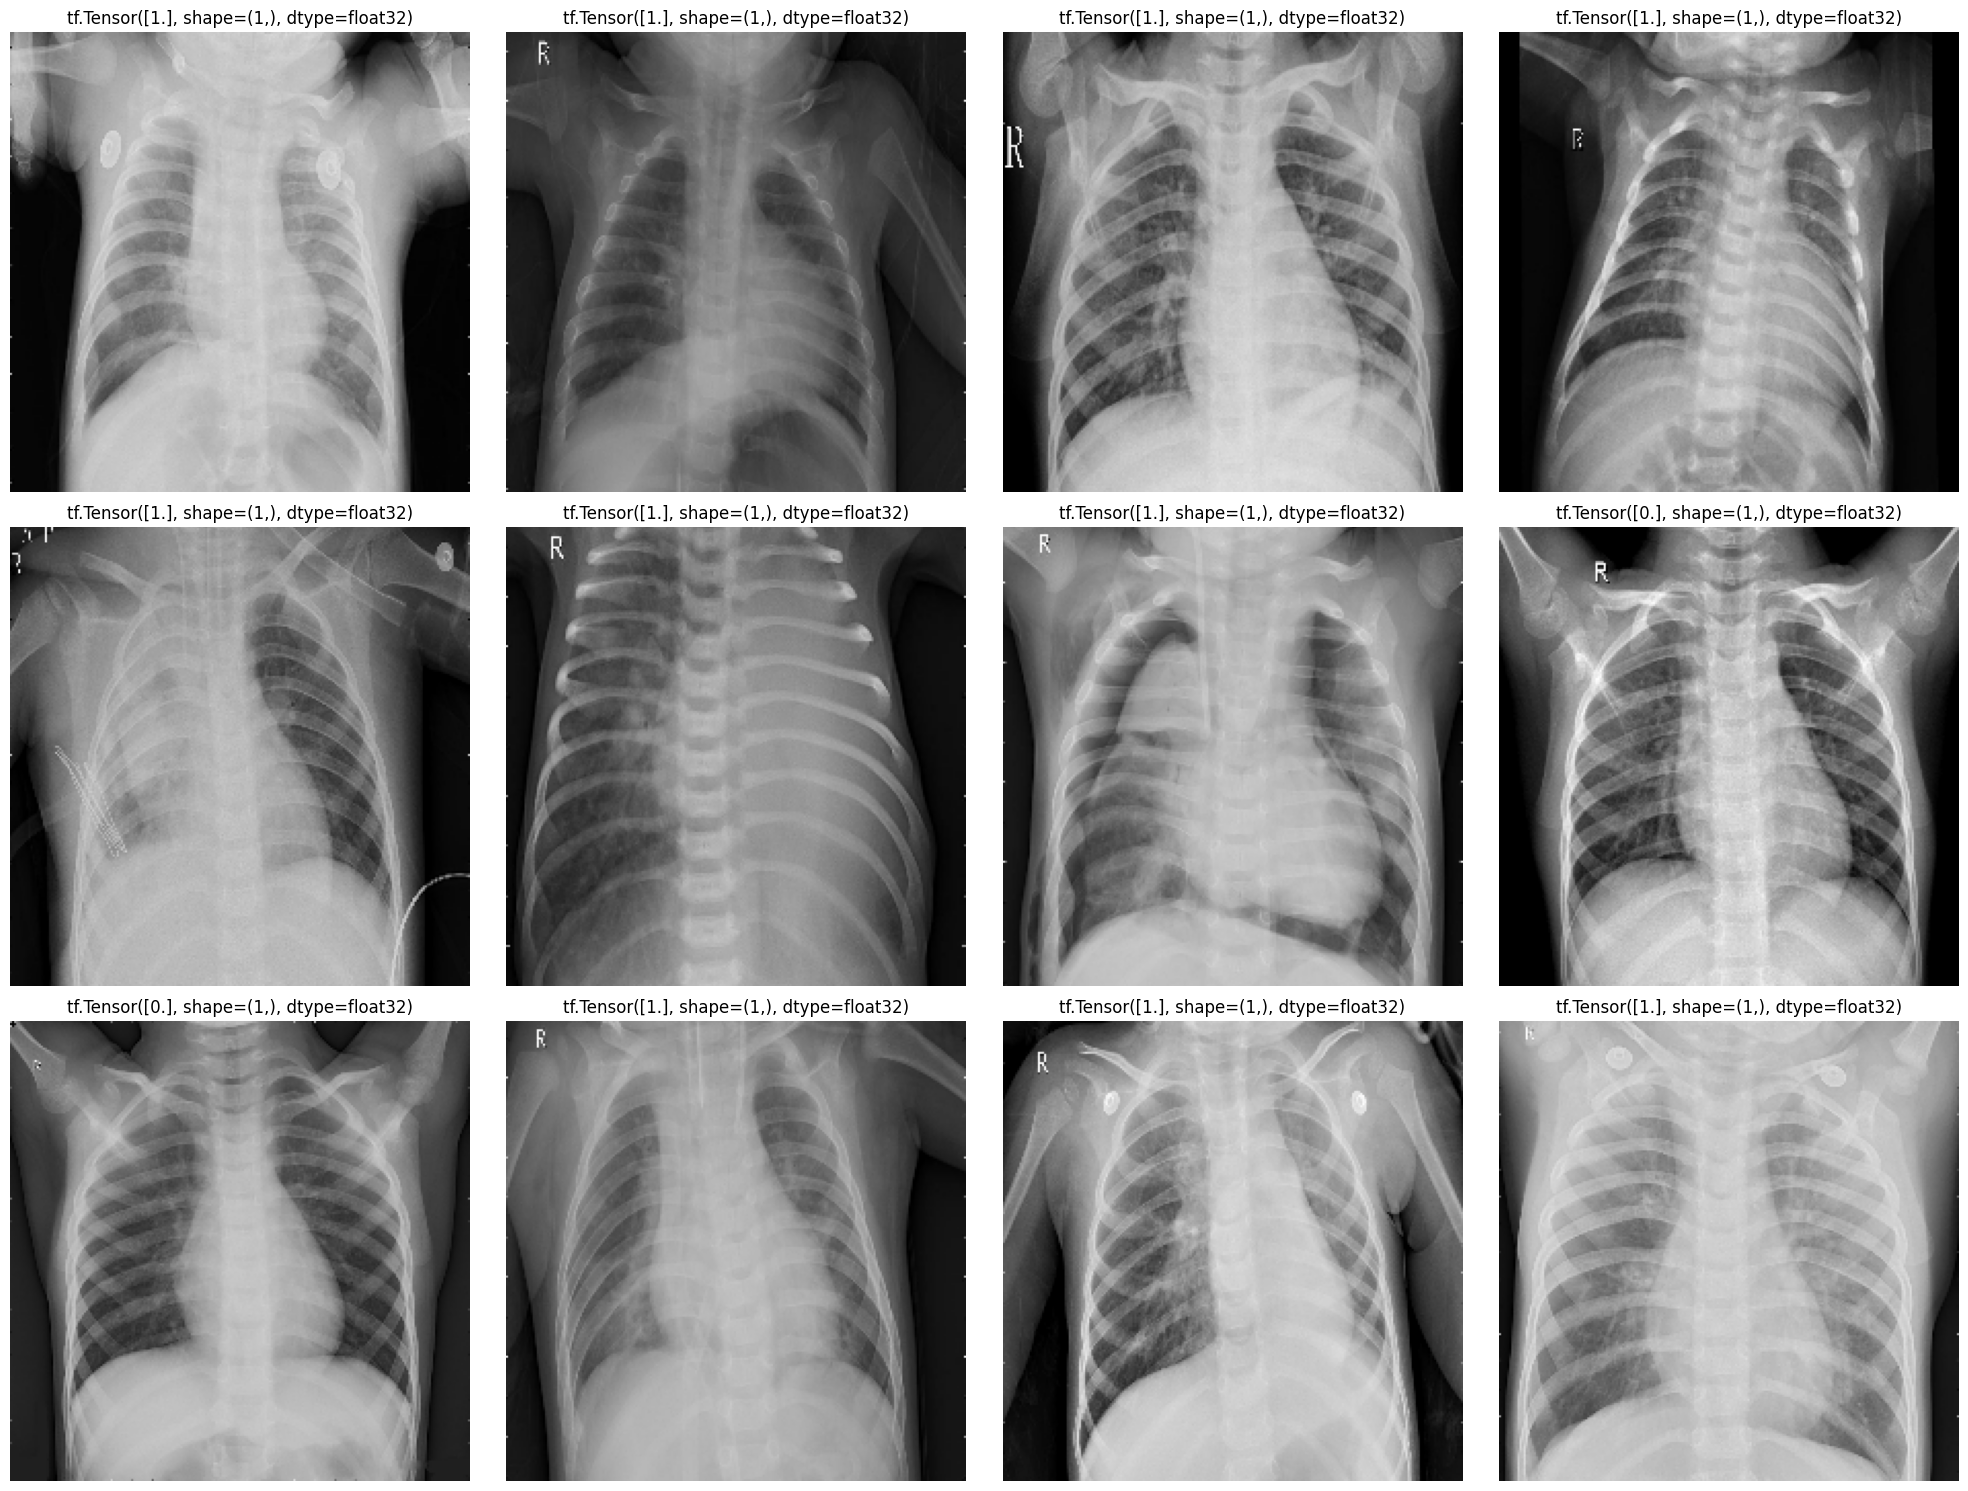

In [5]:
# class_names = train_ds.class_names  # This gives label names
plt.figure(figsize=(20, 15))

for images, labels in train_ds.take(1):  # take one batch
    for i in range(12):  # show 12 images
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i])
        plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
labels_list_train = []

for images, labels in train_ds.unbatch():
    labels_list_train.append(int(labels.numpy().squeeze()))

unique, counts = np.unique(labels_list_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

Class Distribution: {np.int64(0): np.int64(1343), np.int64(1): np.int64(3875)}


In [7]:
labels_list_test = []

for images, labels in test_ds.unbatch():
    labels_list_test.append(int(labels.numpy().squeeze()))

unique, counts = np.unique(labels_list_test, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

Class Distribution: {np.int64(0): np.int64(234), np.int64(1): np.int64(390)}


In [8]:
for i, class_name in enumerate(train_ds.class_names):
    print(f"Label {i} -> Class '{class_name}'")

Label 0 -> Class 'NORMAL'
Label 1 -> Class 'PNEUMONIA'


In [9]:
for i, class_name in enumerate(test_ds.class_names):
    print(f"Label {i} -> Class '{class_name}'")

Label 0 -> Class 'NORMAL'
Label 1 -> Class 'PNEUMONIA'


In [10]:
for i, class_name in enumerate(valid_ds.class_names):
    print(f"Label {i} -> Class '{class_name}'")

Label 0 -> Class 'NORMAL'
Label 1 -> Class 'PNEUMONIA'


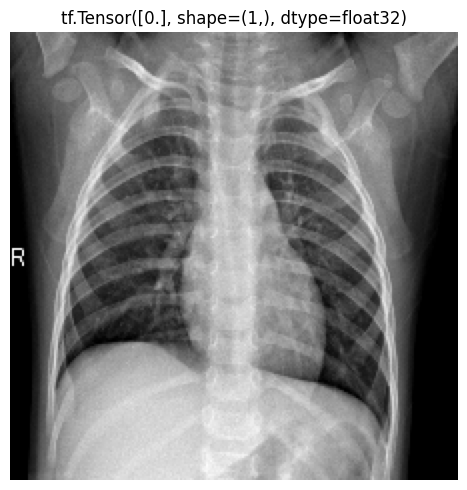

In [11]:
# class_names = train_ds.class_names  # This gives label names
plt.figure(figsize=(5, 5))

for images, labels in train_ds: 
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.title(labels[0])
        plt.axis("off")

plt.tight_layout()
plt.show()

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


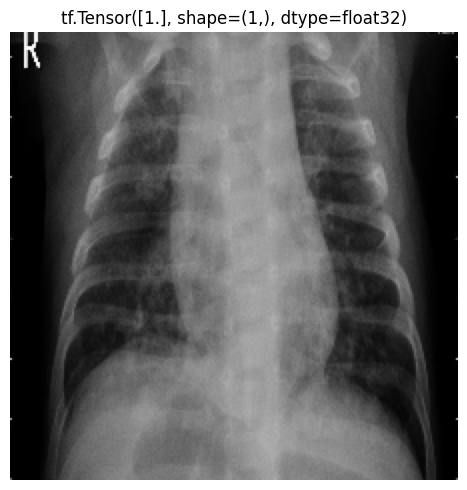

In [12]:
# class_names = test_ds.class_names  # This gives label names
plt.figure(figsize=(5, 5))

for images, labels in test_ds: 
        plt.imshow(images[1].numpy().astype("uint8"))
        plt.title(labels[1])
        plt.axis("off")
        print(images[1].shape)

plt.tight_layout()
plt.show()

In [13]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.RandomContrast(0.1),
])

In [14]:
def process (image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [15]:
from keras.callbacks import EarlyStopping

In [16]:
from keras.layers import BatchNormalization

In [17]:
model = Sequential()

In [18]:
model.add(Input(shape=(224, 224, 3)))
model.add(data_augmentation)

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D( pool_size=(2, 2)))


model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D( pool_size=(2, 2)))

model.add(Conv2D(128,(3,3), padding='same',activation='relu'))
model.add(Conv2D(128,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,659,009 (197.06 MB)

 Trainable params: 51,659,009 (197.06 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Calculate class weights
neg = len(tf.io.gfile.glob('train/NORMAL/*'))
pos = len(tf.io.gfile.glob('train/PNEUMONIA/*'))
total = neg + pos

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0 (Normal): {weight_for_0:.2f}')
print(f'Weight for class 1 (Pneumonia): {weight_for_1:.2f}')

Weight for class 0 (Normal): 1.94
Weight for class 1 (Pneumonia): 0.67


In [21]:
checkpoint = ModelCheckpoint('best_medical_classifier.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau( monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'],)

In [23]:
model.fit(train_ds,batch_size=32, epochs=20, validation_data=test_ds, class_weight=class_weight, callbacks=[checkpoint, early_stopping,reduce_lr])

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.4251 - loss: 1.0254 - val_accuracy: 0.7179 - val_loss: 0.5818 - learning_rate: 0.0010
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.6953 - loss: 0.5658 - val_accuracy: 0.7051 - val_loss: 1.7386 - learning_rate: 0.0010
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.7459 - loss: 0.5026 - val_accuracy: 0.7965 - val_loss: 0.5355 - learning_rate: 0.0010
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.7710 - loss: 0.4816 - val_accuracy: 0.8045 - val_loss: 0.4763 - learning_rate: 0.0010
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.8114 - loss: 0.4135 - val_accuracy: 0.7516 - val_loss: 0.5607 - learning_rate: 0.0010
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.8241 - loss: 0.3829 - val_accuracy: 0.7997 - val_loss: 0.4122 - learning_rate: 0.0010
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.8461 - loss: 0.

In [35]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 899ms/step - accuracy: 0.8843 - loss: 0.2544


[0.2615905702114105, 0.8942307829856873]

In [36]:
model.evaluate(train_ds)

164/164 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9095 - loss: 0.2460


[0.2432434856891632, 0.9099271893501282]

In [37]:
model.history.history

{'accuracy': [0.4315829873085022,
  0.7180912494659424,
  0.7500958442687988,
  0.7914909720420837,
  0.818321168422699,
  0.8378689289093018,
  0.8495592474937439,
  0.8750479221343994,
  0.9009199142456055,
  0.9151015877723694,
  0.9321579337120056,
  0.9298582077026367,
  0.9503641128540039,
  0.9553468823432922,
  0.9538137316703796,
  0.9591797590255737,
  0.9593713879585266,
  0.962054431438446,
  0.9610962271690369],
 'loss': [0.7593606114387512,
  0.5305244326591492,
  0.4884445071220398,
  0.42150869965553284,
  0.3844347894191742,
  0.34983545541763306,
  0.33845070004463196,
  0.29811128973960876,
  0.23449888825416565,
  0.2095717489719391,
  0.17556968331336975,
  0.16295181214809418,
  0.12182469666004181,
  0.11891323328018188,
  0.11451584845781326,
  0.0999343991279602,
  0.09869080781936646,
  0.0987773984670639,
  0.0989537239074707],
 'val_accuracy': [0.7179487347602844,
  0.7051281929016113,
  0.7964743375778198,
  0.8044871687889099,
  0.7516025900840759,
  0.799

In [38]:
model.history.history['accuracy']

[0.4315829873085022,
 0.7180912494659424,
 0.7500958442687988,
 0.7914909720420837,
 0.818321168422699,
 0.8378689289093018,
 0.8495592474937439,
 0.8750479221343994,
 0.9009199142456055,
 0.9151015877723694,
 0.9321579337120056,
 0.9298582077026367,
 0.9503641128540039,
 0.9553468823432922,
 0.9538137316703796,
 0.9591797590255737,
 0.9593713879585266,
 0.962054431438446,
 0.9610962271690369]

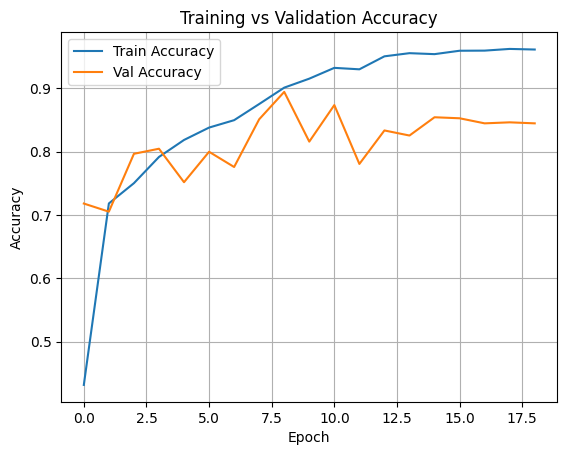

In [39]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

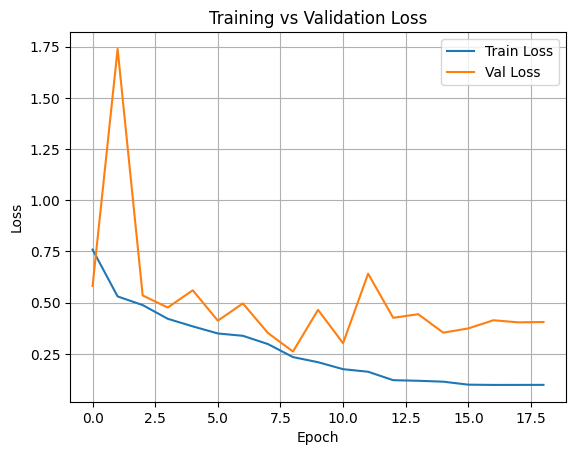

In [40]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [41]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true).flatten()

y_pred_probs = model.predict(test_ds)

y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print(y_pred)

f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}\n")

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal (0)', 'Pneumonia (1)']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 966ms/step
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0
 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1

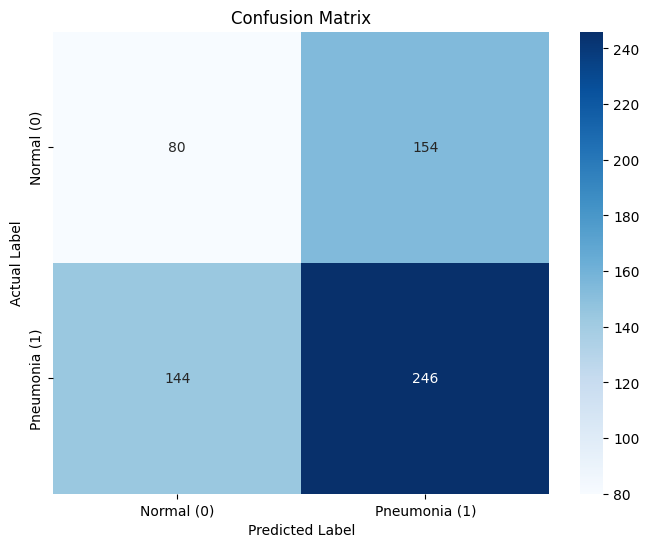

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Pneumonia (1)'],
            yticklabels=['Normal (0)', 'Pneumonia (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [43]:
model.evaluate(valid_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step - accuracy: 0.8125 - loss: 54.3123


[54.31229782104492, 0.8125]